# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
from tqdm import tqdm


# DATA LOAD

In [2]:
df = pd.read_csv("../data/for_simulation.csv")

# 1. 최소 리워드를 제공 할 때 순이익이 0을 넘길 수 있는 성장율
- ('High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0)

## 시뮬레이션

In [3]:
increase_rate_combinations = []
reward_combinations = [
    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}]

for i in np.arange(5, 26, 0.1):
    increase_rate_combinations.append({'High': i * 0.01, 'Mid': i * 0.01, 'Low': i * 0.01, 'Very Low': i * 0.01})

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)
        rate = increase_rates[trust_level]
        simulation_revenue = int(initial_revenue * (1 + rate))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': increase_rates,
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })

# 결과 DataFrame 생성
minreward_simulation = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

minreward_simulation.sort_values(by=["Additional Revenue"],ascending=False)


다양한 시뮬레이션 결과:


,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue
209,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.2589999999999993, 'Mid': 0.25899999...",1993048,2509245,186267,2322978,329930
208,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.2579999999999993, 'Mid': 0.25799999...",1993048,2507252,186267,2320985,327937
207,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25699999999999923, 'Mid': 0.2569999...",1993048,2505259,186267,2318992,325944
206,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.2559999999999993, 'Mid': 0.25599999...",1993048,2503267,186267,2317000,323952
205,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.2549999999999993, 'Mid': 0.25499999...",1993048,2501273,186267,2315006,321958
...,...,...,...,...,...,...,...
4,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.053999999999999986, 'Mid': 0.053999...",1993048,2100671,186267,1914404,-78644
3,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.05299999999999999, 'Mid': 0.0529999...",1993048,2098677,186267,1912410,-80638
2,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.05199999999999999, 'Mid': 0.0519999...",1993048,2096684,186267,1910417,-82631
1,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.051, 'Mid': 0.051, 'Low': 0.051, 'V...",1993048,2094691,186267,1908424,-84624


## 분포 보기

Expected Values (Means):
2114704.9285714286

Variances:
14667496177.234108

Standard Deviations:
121109.43884451826

95% Confidence Intervals:
Initial Revenue: nan ~ nan
Simulation Revenue: 2284591.83 ~ 2317352.02
Reward Provided: nan ~ nan
Simulation Net Profit: 2098324.83 ~ 2131085.02
Additional Revenue: 105276.83 ~ 138037.02

T-Test between Simulation Revenue and Initial Revenue: t-stat=36.84, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue                    NaN                 NaN              NaN   
Simulation Revenue                 NaN                 1.0              NaN   
Reward Provided                    NaN                 NaN              NaN   
Simulation Net Profit              NaN                 1.0              NaN   
Additional Revenue                 NaN                 1.0              NaN   

                       Simulation Net Profit  Additional Revenue  
Initial Revenue       

c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


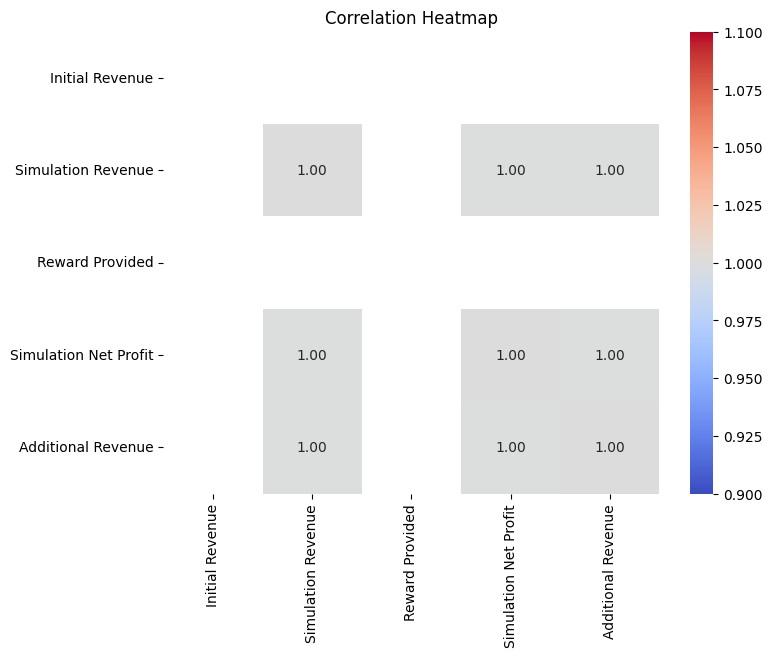

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind

# 1. 기댓값 (Expected Value)
expected_values = minreward_simulation['Simulation Net Profit'].mean()
print("Expected Values (Means):")
print(expected_values)

# 2. 분산 및 표준편차
variances = minreward_simulation['Simulation Net Profit'].var()
std_devs = minreward_simulation['Simulation Net Profit'].std()
print("\nVariances:")
print(variances)
print("\nStandard Deviations:")
print(std_devs)

# 3. 신뢰 구간 (95% Confidence Interval)
confidence = 0.95
confidence_intervals = {}
for col in ['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']:
    mean = minreward_simulation[col].mean()
    std_error = minreward_simulation[col].std() / np.sqrt(len(minreward_simulation))  # 표준 오차
    ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
    confidence_intervals[col] = (ci_lower, ci_upper)
print("\n95% Confidence Intervals:")
for col, ci in confidence_intervals.items():
    print(f"{col}: {ci[0]:.2f} ~ {ci[1]:.2f}")

# 4. t-test (정책 효과 비교)
# 가정: Simulation Revenue와 Initial Revenue의 차이가 유의미한지 검정
t_stat, p_value = ttest_ind(minreward_simulation['Simulation Revenue'], minreward_simulation['Initial Revenue'], equal_var=False)
print(f"\nT-Test between Simulation Revenue and Initial Revenue: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

# 5. 상관관계 분석
correlation_matrix = minreward_simulation[['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 시각화 (상관 분석 히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


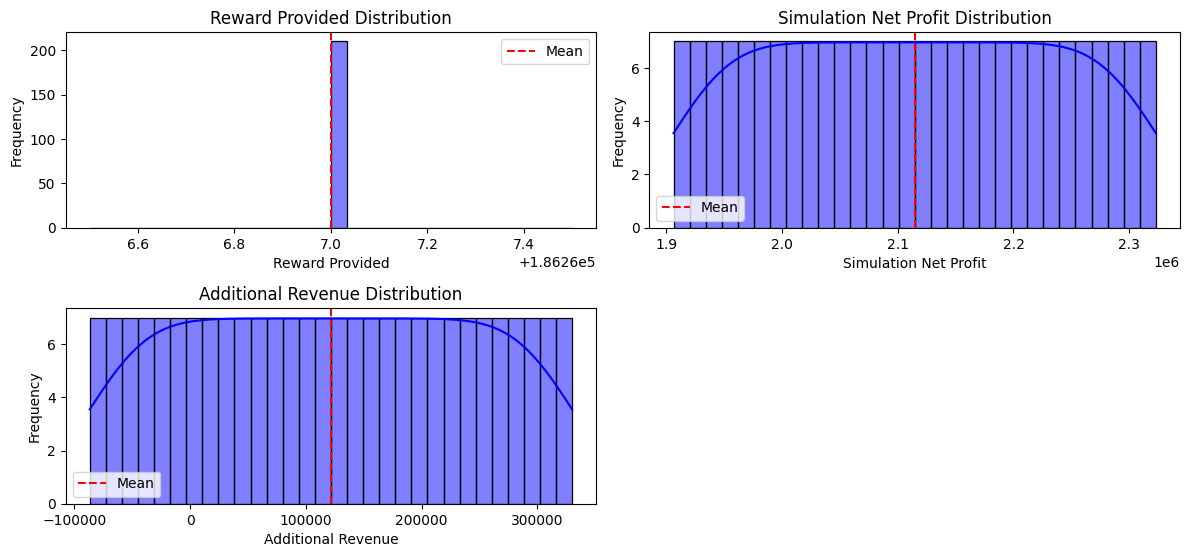

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포를 확인할 주요 컬럼 리스트
columns_to_plot = [
    'Reward Provided', 
    'Simulation Net Profit', 
    'Additional Revenue'
]

# 분포 그래프 그리기
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # 3행 2열 그래프 배치
    sns.histplot(minreward_simulation[col], kde=True, bins=30, color='blue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.axvline(minreward_simulation[col].mean(), color='red', linestyle='--', label='Mean')
    plt.legend()

plt.tight_layout()
plt.show()


# 2. 최대 리워드를 제공 할 때 순이익이 0을 넘길 수 있는 성장율
- ('High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0)